# K-Nearest Neighbors - Clasificación

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import numpy as np
import pandas as pd
import os

df = pd.read_csv(os.getcwd() + "\\data\\2008_small.csv",nrows=100000)

Seleccionaremos 4 columnas que vamos a usar como predictoras!

In [2]:
newdf = df[["AirTime","Distance","TaxiOut","ArrDelay"]].dropna()
cols = newdf[newdf.columns[newdf.columns != "ArrDelay"]]

In [3]:
cols

,AirTime,Distance,TaxiOut
0,69.0,431,78.0
1,246.0,1848,9.0
2,89.0,641,11.0
3,219.0,1557,27.0
4,64.0,412,12.0
...,...,...,...
99995,30.0,134,12.0
99996,131.0,936,14.0
99997,36.0,201,12.0
99998,221.0,1721,10.0


Y nos generaremos una columna respuesta categórica...

In [4]:
filtro = newdf["ArrDelay"] > 10 

In [5]:
newdf["ArrDelay"][filtro] = "Delayed"
newdf["ArrDelay"][filtro== False] = "Not Delayed"

In [6]:
newdf

,AirTime,Distance,TaxiOut,ArrDelay
0,69.0,431,78.0,Delayed
1,246.0,1848,9.0,Delayed
2,89.0,641,11.0,Not Delayed
3,219.0,1557,27.0,Not Delayed
4,64.0,412,12.0,Not Delayed
...,...,...,...,...
99995,30.0,134,12.0,Delayed
99996,131.0,936,14.0,Not Delayed
99997,36.0,201,12.0,Not Delayed
99998,221.0,1721,10.0,Delayed


Ajustamos el modelo

In [7]:
nbrs_3 = KNeighborsClassifier(n_neighbors=3)

In [8]:
nbrs_3.fit(cols,newdf["ArrDelay"]) # Entrenar

KNeighborsClassifier(n_neighbors=3)

In [9]:
predicciones_3 = nbrs_3.predict(cols) # Le he pedido predicciones

In [10]:
predicciones_3

array(['Delayed', 'Not Delayed', 'Not Delayed', ..., 'Not Delayed',
       'Not Delayed', 'Not Delayed'], dtype=object)

In [11]:
np.mean(predicciones_3 == newdf["ArrDelay"])

0.8411570433840144

In [12]:
newdf["ArrDelay"].value_counts()/len(newdf["ArrDelay"])

Not Delayed    0.737641
Delayed        0.262359
Name: ArrDelay, dtype: float64

In [13]:
np.mean(predicciones_3 == newdf["ArrDelay"]) # Precisión / Accuracy

0.8411570433840144

Probamos con distintas k...

In [14]:
nbrs_1 = KNeighborsClassifier(n_neighbors=2)
nbrs_1.fit(cols,newdf["ArrDelay"])
predicciones_1 = nbrs_1.predict(cols)
np.mean(predicciones_1 == newdf["ArrDelay"])

0.8340916759542336

Comparemos los resultados con la predicción más simple que podemos hacer... la media.

In [15]:
np.mean(newdf["ArrDelay"] == "Not Delayed")

0.7376407194200468

### Visualización de resultados de clasificación

In [4]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(newdf["ArrDelay"],predicciones_1)
print(confusion)

NameError: name 'newdf' is not defined

<AxesSubplot:>

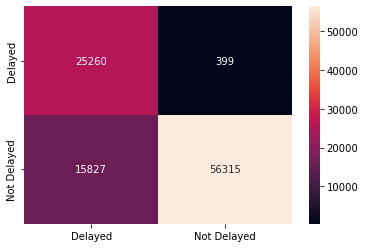

In [17]:
import seaborn as sns
sns.heatmap( confusion, annot=True,fmt='.6g',
            xticklabels= nbrs_1.classes_, 
            yticklabels=nbrs_1.classes_)

¿Y para convertirla a porcentaje?

In [18]:
confusion_matrix / np.sum(confusion_matrix)

array([[0.25827957, 0.00407971],
       [0.16182861, 0.57581211]])

<AxesSubplot:>

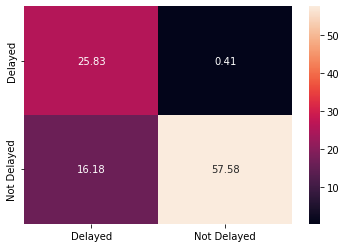

In [19]:
sns.heatmap( np.round(confusion_matrix / np.sum(confusion_matrix) * 100,2), annot=True,fmt='.6g',
            xticklabels= ["Delayed","Not Delayed"], 
            yticklabels=["Delayed","Not Delayed"]
           )

#### Introducción a la selección de parámetros

A continuación, vamos a ver un ejemplo de como seleccionar los parámetros usando bucles. Más adelante podremos ver maneras alternativas, pero es importante tener control manual sobre estos procesos.

In [20]:
newdf = df[["AirTime","Distance","TaxiOut","TaxiIn","ArrDelay"]].dropna()
filtro = newdf["ArrDelay"] > 10 

cols = newdf[newdf.columns[newdf.columns != "ArrDelay"]]

newdf["ArrDelay"][filtro] = "Delayed"
newdf["ArrDelay"][filtro== False] = "Not Delayed"

In [21]:
listaparametros = list(range(1,16))
listaprecision = []

for i in range(0,len(listaparametros)):
    clasificador = KNeighborsClassifier(n_neighbors=listaparametros[i])
    clasificador.fit(cols,newdf["ArrDelay"])
    predicciones = clasificador.predict(cols)
    listaprecision.append(np.mean(predicciones == newdf["ArrDelay"]))
    
    print("k=",listaparametros[i],"Precision:",listaprecision[i])


k= 1 Precision: 0.9928835083485854
k= 2 Precision: 0.8476498195314977
k= 3 Precision: 0.8452981053363463
k= 4 Precision: 0.8205335323769696
k= 5 Precision: 0.8167503399760738
k= 6 Precision: 0.8084477663827568
k= 7 Precision: 0.8056461590372287
k= 8 Precision: 0.8026809541824725
k= 9 Precision: 0.8001042934121328
k= 10 Precision: 0.799173832578399
k= 11 Precision: 0.7966176214967127
k= 12 Precision: 0.7968016686945941
k= 13 Precision: 0.7943170315231951
k= 14 Precision: 0.794838498583859
k= 15 Precision: 0.7927219558082228


### Ejercicios KNN

1. Ajusta un modelo de KNN para los datos "iris". Qué columnas usaremos para clasificar y cuál va a ser la respuesta?

**(Intenta hacerlo usando validación externa!)**

In [22]:
import seaborn as sns
df = sns.load_dataset("iris")

# Preparar los datos para la validación externa
Y = df["species"]
X = df[["sepal_length","petal_width","sepal_width","petal_length"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25)

# Entrenar el modelo
nbrs = KNeighborsClassifier(n_neighbors=5)
nbrs.fit(X_train,y_train)

# Evaluar el modelo
predicciones = nbrs.predict(X_test)
np.mean(predicciones == y_test)

print("Accuracy: ", np.mean(predicciones == y_test),
      "\nAciertos: ",(predicciones == y_test).sum(), "\nFallos", 
      y_test.shape[0] - (predicciones == y_test).sum())

Accuracy:  0.9736842105263158 
Aciertos:  37 
Fallos 1


2. Muestra los datos gráficamente

In [23]:
matrizconfusion = confusion_matrix(y_test,predicciones)
sns.heatmap( matrizconfusion, annot=True,fmt='.6g',
            xticklabels= nbrs.classes_, 
            yticklabels= nbrs.classes_ )

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
sns.scatterplot(data = df, x = "sepal_length", y = "petal_length", hue = "species")

3. Prueba si es más productivo hacerlo con los datos escalados con media 0 y desviación 1 o con los datos originales.

4. Te animas a generar un bucle que permita escoger qué "k" es más favorable para estos datos?

In [ ]:
import seaborn as sns
df = sns.load_dataset("iris")

listaks = list(range(1,10))

Y = df["species"]
X = df[["sepal_length","petal_width","sepal_width","petal_length"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25)

for k in listaks:
    nbrs = KNeighborsClassifier(n_neighbors=k)
    nbrs.fit(X_train,y_train)

    predicciones = nbrs.predict(X_test)
    np.mean(predicciones == y_test)

    print("K=",k,"\tAccuracy: ", np.mean(predicciones == y_test),
          "\nAciertos: ",(predicciones == y_test).sum(), "\nFallos", 
          y_test.shape[0] - (predicciones == y_test).sum())

#### Ejemplo (chapucero) cross validación

In [ ]:
import seaborn as sns
df = sns.load_dataset("iris")

resultados = dict()

listaks = list(range(1,20))

Y = df["species"]
X = df[["sepal_length","petal_width","sepal_width","petal_length"]]

for k in listaks:
    print("Vaciamos la lista")
    listaprecisiones = []
    for semilla in range(1,20):
        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, 
                                                            random_state= semilla)
        
        nbrs = KNeighborsClassifier(n_neighbors=k)
        nbrs.fit(X_train,y_train)

        predicciones = nbrs.predict(X_test)
        print("Añadimos la semilla",semilla,"a la lista")
        listaprecisiones.append( np.mean(predicciones == y_test) )
    
    print("Guardamos la lista en el diccionario")
    resultados["k = " + str(k)] = listaprecisiones
    print("K=",k,"\tAccuracy: ", np.mean(listaprecisiones))

5. Crea una matriz de confusión con los datos

6. (Extra) Representar gráficamente (nube de puntos) cuáles son los valores mal clasificados.

In [ ]:
dftest = pd.concat([X_test, y_test],axis = 1)
dftest["Accuracy"] = predicciones == y_test

In [ ]:
dftest.head(10)

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(data = dftest, x = "sepal_length", y = "petal_length", 
                hue = "species", size = "Accuracy")

# Árboles de Clasificación

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [24]:
X_train, X_test, y_train, y_test = train_test_split(cols, newdf["ArrDelay"], test_size=.2)

In [25]:
y_train

51257        Delayed
98813    Not Delayed
42541    Not Delayed
11962    Not Delayed
42338        Delayed
            ...     
22912    Not Delayed
49072    Not Delayed
1778     Not Delayed
47429    Not Delayed
54895    Not Delayed
Name: ArrDelay, Length: 78240, dtype: object

In [26]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
np.mean(predictions == y_test)

0.6710290884924084

In [28]:
y_train.value_counts() / len(y_train)

Not Delayed    0.738126
Delayed        0.261874
Name: ArrDelay, dtype: float64

### validación interna de un árbol

In [29]:
clf = tree.DecisionTreeClassifier()
clf.fit(cols,newdf["ArrDelay"])
predictions = clf.predict(cols)
np.mean(predictions == newdf["ArrDelay"])

0.9932822772773284

Ajustes de parámetros manuales

In [67]:
clf = tree.DecisionTreeClassifier(min_samples_split = 0.005,  
                                  #class_weight = "balanced",
                                  max_features=4)
clf.fit(X_train,y_train)

# Evaluación externa
predictions = clf.predict(X_test)
np.mean(predictions == y_test)

0.7715863197178059

### Ejercicios Árboles

1. Ajusta un modelo de árbol para los datos "iris".

In [12]:
import seaborn as sns
from sklearn.metrics import f1_score

df = sns.load_dataset("iris")

# Preparar los datos para la validación externa
Y = df["species"]
X = df[["sepal_length","petal_width","sepal_width","petal_length"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25)

# Entrenar el modelo
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

# Evaluar el modelo
predicciones = clf.predict(X_test)
np.mean(predicciones == y_test)

print("Accuracy: ", np.mean(predicciones == y_test),
      "\nAciertos: ",(predicciones == y_test).sum(), "\nFallos", 
      y_test.shape[0] - (predicciones == y_test).sum(), "\nF1", 
      f1_score(y_test, predicciones, average='macro'))

Accuracy:  0.9210526315789473 
Aciertos:  35 
Fallos 3 
F1 0.9259259259259259


2. Muestra los datos gráficamente como consideres, y representa el árbol de decisiones

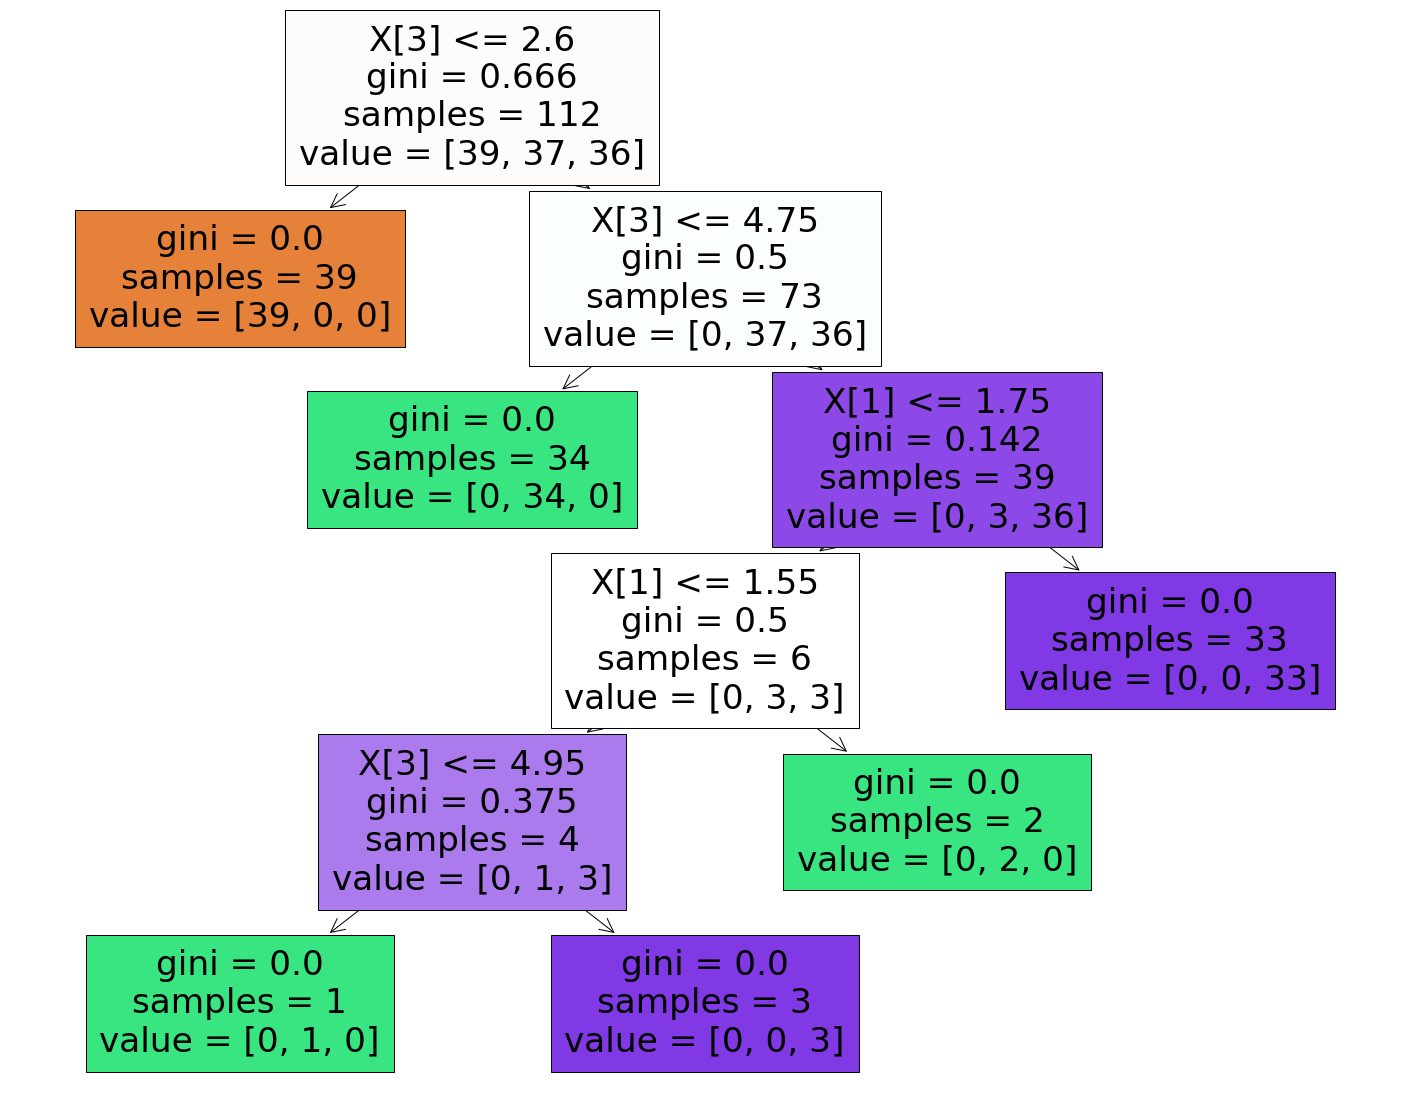

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled = True,);

3. Te animas a generar un bucle que permita escoger qué combinaciones de parámetros son más favorables para estos datos?

In [40]:
# Preparar los datos para la validación externa
Y = df["species"]
X = df[["sepal_length","petal_width","sepal_width","petal_length"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=93)

for criterio in ["gini", "entropy", "log_loss"]:
    for profundidad in [1,2,3,4,5,6,7,8,9,10,None]:

    
        # Entrenar el modelo
        clf = tree.DecisionTreeClassifier(max_depth=profundidad, criterion=criterio)
        clf.fit(X_train,y_train)

        # Evaluar el modelo
        predicciones = clf.predict(X_test)
        np.mean(predicciones == y_test)

        print("Criterio", criterio,"Profundidad:", profundidad,
              "Accuracy: ", np.mean(predicciones == y_test), "F1", 
              f1_score(y_test, predicciones, average='macro'))

Criterio gini Profundidad: 1 Accuracy:  0.6578947368421053 F1 0.5495495495495496
Criterio gini Profundidad: 2 Accuracy:  0.9473684210526315 F1 0.9465811965811964
Criterio gini Profundidad: 3 Accuracy:  0.9210526315789473 F1 0.9194847020933977
Criterio gini Profundidad: 4 Accuracy:  0.9736842105263158 F1 0.9733333333333333
Criterio gini Profundidad: 5 Accuracy:  0.9736842105263158 F1 0.9733333333333333
Criterio gini Profundidad: 6 Accuracy:  0.9736842105263158 F1 0.9733333333333333
Criterio gini Profundidad: 7 Accuracy:  0.9736842105263158 F1 0.9733333333333333
Criterio gini Profundidad: 8 Accuracy:  0.9736842105263158 F1 0.9733333333333333
Criterio gini Profundidad: 9 Accuracy:  0.9736842105263158 F1 0.9733333333333333
Criterio gini Profundidad: 10 Accuracy:  0.9736842105263158 F1 0.9733333333333333
Criterio gini Profundidad: None Accuracy:  0.9736842105263158 F1 0.9733333333333333
Criterio entropy Profundidad: 1 Accuracy:  0.6578947368421053 F1 0.5495495495495496
Criterio entropy Prof

In [69]:
clf = tree.DecisionTreeClassifier(max_depth=2, criterion="gini")
clf.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

In [70]:
flornueva = pd.DataFrame(columns=X.columns, index=range(1))

flornueva["sepal_length"] = float(input("sepal_length: "))
flornueva["petal_width"] = float(input("petal_width: "))
flornueva["sepal_width"] = float(input("sepal_width: "))
flornueva["petal_length"] = float(input("petal_length: "))

print("La especie es...",clf.predict(flornueva)[0])

sepal_length: 4
petal_width: 5
sepal_width: 6
petal_length: 7
La especie es... virginica


In [71]:
clf.predict_proba(flornueva) 
# 0% probabilidad de setosa
# 2% probabilidad de versicolora
# 98% probabilidad de virginica

array([[0.        , 0.02173913, 0.97826087]])

4. Crea una matriz de confusión con los datos

5. Explora otras opciones de evaluación de los modelos

https://towardsdatascience.com/how-to-best-evaluate-a-classification-model-2edb12bcc587

0.967741935483871

6. Implementa alguna de las soluciones

© Netmind S.L.

Todos los derechos reservados. Este documento (v1.00) ha sido diseñado para el uso exclusivo del cliente que atiende a esta formación.

Ninguna parte de este documento puede ser reproducida, distribuida o transmitida en cualquier forma o por cualquier medio sin el permiso previo por escrito de Netmind.

In [ ]:
from sklearn.metrics import f1_score
f1_score(newdf["ArrDelay"].apply(lambda x: 1 if x == "Not Delayed" else 0),
         pd.DataFrame(predicciones_1)[0].apply(lambda x: 1 if x == "Not Delayed" else 0))